2023-11-26%
2023-11-27%
2023-11-28%
2023-11-29%
2023-11-30%
2023-12-01%
2023-12-02%
2023-12-03%
2023-12-04%
2023-12-05%
2023-12-06%


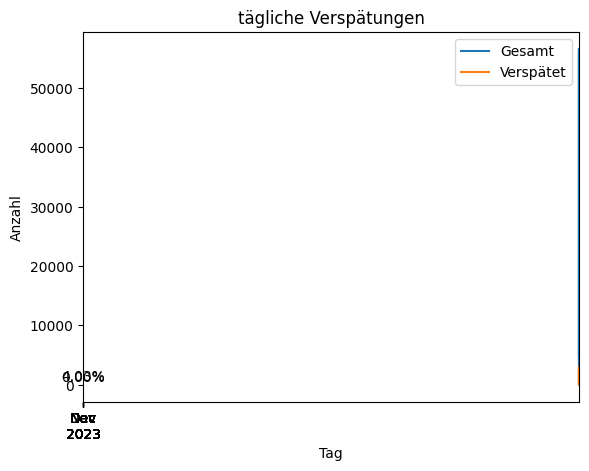

In [32]:
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import pymysql
import datetime

db = pymysql.connect(host="localhost", user="rnv_importer", password="rnv_importer", database="rnv_big_data_mining")
cursor = db.cursor()

day = []
total = []
delayed = []

from datetime import date, timedelta

start_date = date(2023, 11, 26)
end_date = date.today()
delta = timedelta(days=1)
while start_date <= end_date:
    print(start_date.strftime("%Y-%m-%d%"))

    day.append(start_date)

    cursor.execute("SELECT Count(*) from stops where api_plannedDeparture like %s", start_date.strftime("%Y-%m-%d%"))
    total.append(cursor.fetchone()[0])
    cursor.execute("SELECT Count(*) from stops where (api_plannedDeparture like %s) AND (api_plannedDeparture != api_realtimeDeparture)",  start_date.strftime("%Y-%m-%d%"))
    delayed.append(cursor.fetchone()[0])

    start_date += delta

#df = pd.DataFrame({
#   'Gesamt': total,
#   'Verspätet': delayed
#   }, index= day)
#lines = df.plot.line()

df = pd.DataFrame({
   'Gesamt': total,
   'Verspätet': delayed
}, index=day)

# Plot erstellen
fig, ax = plt.subplots()
lines = df.plot.line(ax=ax)

# Text zu den Linien hinzufügen (nur bei der Linie "Verspätet" und jedem zweiten Tag)
for i, delayed_count in enumerate(delayed):
    if i % 2 == 0 and total[i] != 0:  # Nur jeden zweiten Tag anzeigen und wenn die verspätete Anzahl nicht null ist
        percentage = (delayed_count / total[i]) * 100
        ax.text(i, delayed_count, f'{percentage:.2f}%', ha='center', va='bottom')

# Monat und Jahr auf der X-Achse anzeigen
plt.xticks(range(len(day)), [d.strftime('%b\n%Y') for d in day], rotation=0)

# Achsentitel und Diagrammtitel hinzufügen
plt.xlabel('Tag')
plt.ylabel('Anzahl')
plt.title('tägliche Verspätungen')

# Legende anzeigen
ax.legend()

# Diagramm anzeigen
plt.show()